In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# Ejercicio 01 - 02
Suponga que un paracaidista tiene un instrumento para medir la velocidad con que está cayendo. Los datos obtenidos en una prueba en particular se encuentran en la siguiente tabla:

\begin{center}
	\begin{tabular}{|c|c|}
		\hline
		Tiempo (seg) & Velocidad (cm/seg) \\
		\hline
		1 & 800 \\
		\hline
		3 & 2310 \\
		\hline
		5 & 3090 \\
		\hline
		7 & 3940 \\
		\hline
		13 & 4755 \\
		\hline
	\end{tabular}
\end{center}

Nuestro problema consiste en estimar la velocidad del paracaidista en $t=10$ segundos y para eso debemos ver qué pasa entre el segundo 7 y el 13.

Vamos a ver que el comportamiento de los polinomios de interpolación polinómica algunas veces resulta inesperado e impreciso, para eso:
- Construir el polinomio de interpolación que pasa por los dos últimos datos (esto es, una recta), estimar el valor de $t=10$ segundos.

Polinomio de Lagrange, expresiones
815*x/6 + 17935/6
Polinomio de Lagrange: 
815*x/6 + 17935/6


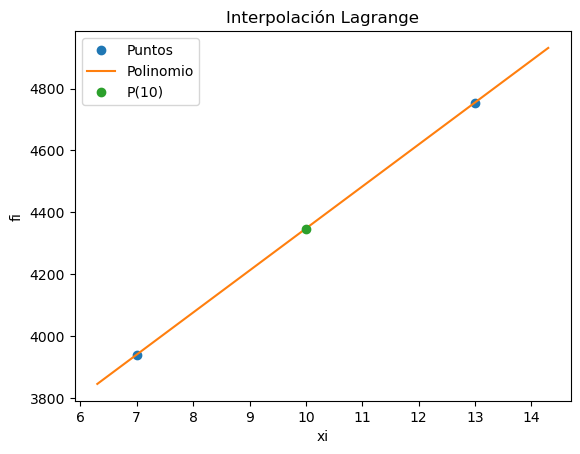

Estimar el valor de t=10 segundos: P(10) = 4347.5


In [2]:
# Interpolacion de Lagrange
# tiempo , velocidad
xi = np.array([1, 3, 5, 7, 13])
fi = np.array([800, 2310, 3090, 3940, 4755])

xi = xi[slice(-2, None, 1)]
fi = fi[slice(-2, None, 1)]
# PROCEDIMIENTO
n = len(xi)
x = sym.Symbol('x')
polinomio = 0
divisorL = np.zeros(n, dtype = float)
for i in range(0,n,1):
    # Termino de Lagrange
    numerador = 1
    denominador = 1
    for j  in range(0,n,1):
        if (j!=i):
            numerador = numerador*(x-xi[j])
            denominador = denominador*(xi[i]-xi[j])
    terminoLi = numerador/denominador

    polinomio = polinomio + terminoLi*fi[i]
    divisorL[i] = denominador

# simplifica el polinomio
polisimple = polinomio.expand()

# para evaluación numérica
px = sym.lambdify(x,polisimple)

# Puntos para la gráfica
muestras = 1001
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(0.9*a,1.1*b,muestras)
pfi = px(pxi)

# SALIDA
print('Polinomio de Lagrange, expresiones')
print(polinomio)
print('Polinomio de Lagrange: ')
print(polisimple)

# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.plot(10,px(10), 'o', label = 'P(10)')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación Lagrange')
plt.show()
plt.close()

print(f'Estimar el valor de t=10 segundos: P(10) = {px(10)}')

- Construir el polinomio de interpolación que pasa por los tres últimos datos (esto es, una parábola), estimar el valor de $t=10$ segundos.

Polinomio de Lagrange, expresiones
1545*(x - 13)*(x - 7)/8 - 985*(x - 13)*(x - 5)/3 + 1585*(x - 7)*(x - 5)/16
Polinomio de Lagrange: 
-1735*x**2/48 + 3435*x/4 - 14405/48


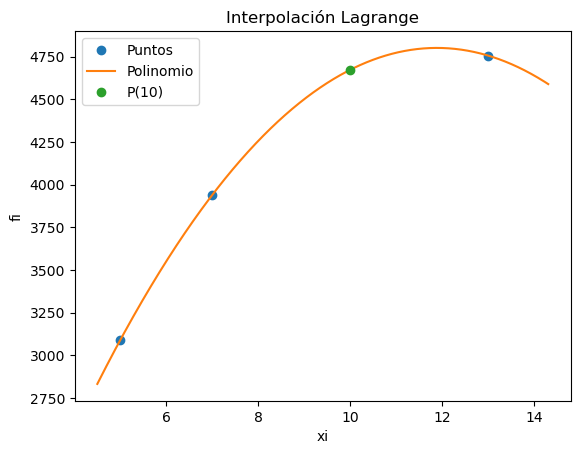

Estimar el valor de t=10 segundos: P(10) = 4672.812499999999


In [3]:
# Interpolacion de Lagrange
# tiempo , velocidad
xi = np.array([1, 3, 5, 7, 13])
fi = np.array([800, 2310, 3090, 3940, 4755])

xi = xi[slice(-3, None, 1)]
fi = fi[slice(-3, None, 1)]
# PROCEDIMIENTO
n = len(xi)
x = sym.Symbol('x')
polinomio = 0
divisorL = np.zeros(n, dtype = float)
for i in range(0,n,1):
    # Termino de Lagrange
    numerador = 1
    denominador = 1
    for j  in range(0,n,1):
        if (j!=i):
            numerador = numerador*(x-xi[j])
            denominador = denominador*(xi[i]-xi[j])
    terminoLi = numerador/denominador

    polinomio = polinomio + terminoLi*fi[i]
    divisorL[i] = denominador

# simplifica el polinomio
polisimple = polinomio.expand()

# para evaluación numérica
px = sym.lambdify(x,polisimple)

# Puntos para la gráfica
muestras = 1001
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(0.9*a,1.1*b,muestras)
pfi = px(pxi)

# SALIDA
print('Polinomio de Lagrange, expresiones')
print(polinomio)
print('Polinomio de Lagrange: ')
print(polisimple)

# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.plot(10,px(10), 'o', label = 'P(10)')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación Lagrange')
plt.show()
plt.close()

print(f'Estimar el valor de t=10 segundos: P(10) = {px(10)}')

- Construir el polinomio de interpolación que pasa por los cuatro últimos datos (esto es, un polinomio cúbico), estimar el valor de $t=10$ segundos

Polinomio de Lagrange, expresiones
-231*(x - 13)*(x - 7)*(x - 5)/8 + 1545*(x - 13)*(x - 7)*(x - 3)/16 - 985*(x - 13)*(x - 5)*(x - 3)/12 + 317*(x - 7)*(x - 5)*(x - 3)/32
Polinomio de Lagrange: 
-431*x**3/96 + 2435*x**2/32 + 119*x/96 + 55765/32


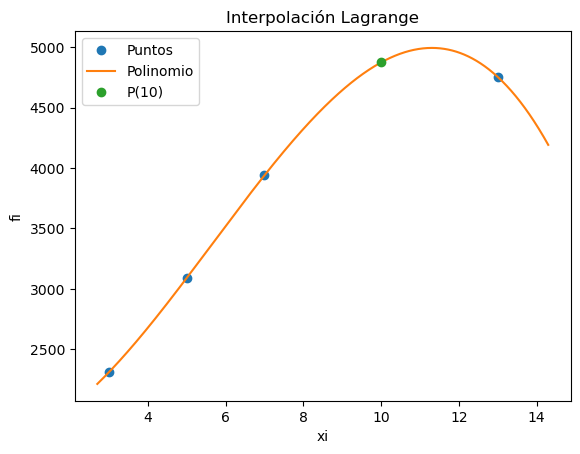

Estimar el valor de t=10 segundos: P(10) = 4874.84375


In [4]:
# Interpolacion de Lagrange
# tiempo , velocidad
xi = np.array([1, 3, 5, 7, 13])
fi = np.array([800, 2310, 3090, 3940, 4755])

xi = xi[slice(-4, None, 1)]
fi = fi[slice(-4, None, 1)]
# PROCEDIMIENTO
n = len(xi)
x = sym.Symbol('x')
polinomio = 0
divisorL = np.zeros(n, dtype = float)
for i in range(0,n,1):
    # Termino de Lagrange
    numerador = 1
    denominador = 1
    for j  in range(0,n,1):
        if (j!=i):
            numerador = numerador*(x-xi[j])
            denominador = denominador*(xi[i]-xi[j])
    terminoLi = numerador/denominador

    polinomio = polinomio + terminoLi*fi[i]
    divisorL[i] = denominador

# simplifica el polinomio
polisimple = polinomio.expand()

# para evaluación numérica
px = sym.lambdify(x,polisimple)

# Puntos para la gráfica
muestras = 1001
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(0.9*a,1.1*b,muestras)
pfi = px(pxi)

# SALIDA
print('Polinomio de Lagrange, expresiones')
print(polinomio)
print('Polinomio de Lagrange: ')
print(polisimple)

# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.plot(10,px(10), 'o', label = 'P(10)')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación Lagrange')
plt.show()
plt.close()

print(f'Estimar el valor de t=10 segundos: P(10) = {px(10)}')

- Construir el polinomio de interpolación que pasa por los cinco datos (esto es, un polinomio de grado cuatro), estimar el valor de $t=10$ segundos.

Polinomio de Lagrange, expresiones
25*(x - 13)*(x - 7)*(x - 5)*(x - 3)/18 - 231*(x - 13)*(x - 7)*(x - 5)*(x - 1)/16 + 1545*(x - 13)*(x - 7)*(x - 3)*(x - 1)/64 - 985*(x - 13)*(x - 5)*(x - 3)*(x - 1)/72 + 317*(x - 7)*(x - 5)*(x - 3)*(x - 1)/384
Polinomio de Lagrange: 
-677*x**4/384 + 359*x**3/8 - 75431*x**2/192 + 14509*x/8 - 84975/128


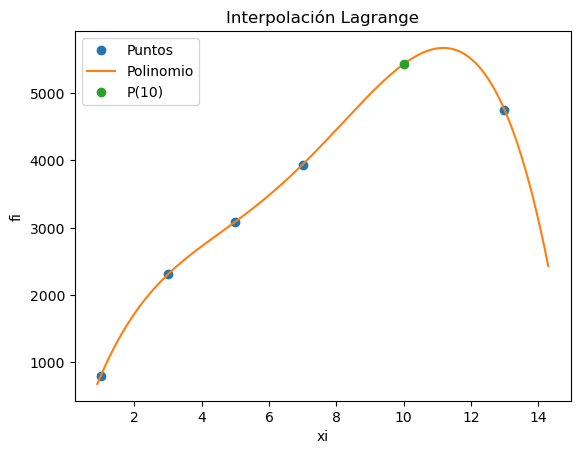

Estimar el valor de t=10 segundos: P(10) = 5430.195312499996


In [5]:
# Interpolacion de Lagrange
# tiempo , velocidad
xi = np.array([1, 3, 5, 7, 13])
fi = np.array([800, 2310, 3090, 3940, 4755])

xi = xi[slice(-5, None, 1)]
fi = fi[slice(-5, None, 1)]
# PROCEDIMIENTO
n = len(xi)
x = sym.Symbol('x')
polinomio = 0
divisorL = np.zeros(n, dtype = float)
for i in range(0,n,1):
    # Termino de Lagrange
    numerador = 1
    denominador = 1
    for j  in range(0,n,1):
        if (j!=i):
            numerador = numerador*(x-xi[j])
            denominador = denominador*(xi[i]-xi[j])
    terminoLi = numerador/denominador

    polinomio = polinomio + terminoLi*fi[i]
    divisorL[i] = denominador

# simplifica el polinomio
polisimple = polinomio.expand()

# para evaluación numérica
px = sym.lambdify(x,polisimple)

# Puntos para la gráfica
muestras = 1001
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(0.9*a,1.1*b,muestras)
pfi = px(pxi)

# SALIDA
print('Polinomio de Lagrange, expresiones')
print(polinomio)
print('Polinomio de Lagrange: ')
print(polisimple)

# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.plot(10,px(10), 'o', label = 'P(10)')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación Lagrange')
plt.show()
plt.close()

print(f'Estimar el valor de t=10 segundos: P(10) = {px(10)}')

# Ejercicio 03
Ahora construya el trazador cúbico que interpola todos los datos de la tabla. Estime el valor de $t=10$ segundos.

In [6]:
def CubicSplines(datos):
    """
    Implementación trazadores cúbicos
    Entradas:
    datos -- lista de puntos (x, y) en el plano ordenados por x

    Salidas:
    a -- vector de coeficientes (constantes)
    b -- vector de coeficientes (lineales)
    c -- vector de coeficientes (cuadráticos)
    d -- vector de coeficientes (cúbicos)
    """
    n = len(datos)-1
    # Inicializar vectores auxiliares
    A = [x[1] for x in datos]
    X = [x[0] for x in datos]
    H = [0.0 for x in range(n)]
    B = [0.0 for x in range(n+1)]
    C = [0.0 for x in range(n+1)]
    D = [0.0 for x in range(n+1)]
    alpha = [0.0 for x in range(n)]
    mu = [0.0 for x in range(n+1)]
    lo = [1.0 for x in range(n+1)]
    z = [0.0 for x in range(n+1)]

    # Crear vector $H$
    for i in range(n):
        H[i] = X[i+1]-X[i]

    # Crear vector $\alpha$
    for i in range(1, n):
        alpha[i] = (3/H[i])*(A[i+1]-A[i])-(3/H[i-1])*(A[i]-A[i-1])

    # Solucionar sistema tridiagonal
    for i in range(1, n):
        lo[i] = 2*(X[i+1]-X[i-1])-H[i-1]*mu[i-1]
        mu[i] = H[i]/lo[i]
        z[i] = (alpha[i]-H[i-1]*z[i-1])/lo[i]

    # Solucionar sistema tridiagonal
    for j in range(n-1, -1, -1):
        C[j] = z[j]-mu[j]*C[j+1]
        B[j] = (A[j+1]-A[j])/(H[j])-H[j]*(C[j+1]+2*C[j])/3
        D[j] = (C[j+1]-C[j])/(3*H[j])

    # Retornar vectores $A$, $B$, $C$, $D$
    return A[:-1], B[:-1], C[:-1], D[:-1]

[800, 2310, 3090, 3940]
[857.4497126436781, 550.1005747126437, 377.1479885057471, 386.30747126436785]
[0.0, -153.67456896551724, 67.19827586206897, -62.61853448275862]
[-25.61242816091954, 36.8121408045977, -21.636135057471265, 3.4788074712643677]


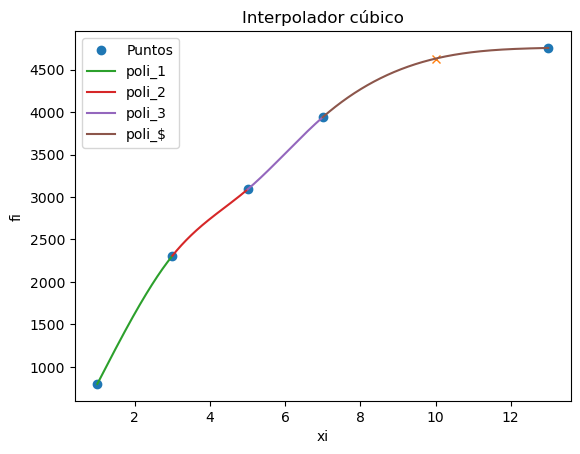

In [7]:
datos = [(1, 800), (3, 2310), (5, 3090), (7, 3940), (13, 4755)]
a, b, c, d = CubicSplines(datos)
print(a)
print(b)
print(c)
print(d)
xi = np.array([1, 3, 5, 7, 13])
fi = np.array([800, 2310, 3090, 3940, 4755])
# Puntos para la gráfica
muestras = 1000
x = np.linspace(xi[0], xi[4], muestras)
pxi_1 = np.linspace(xi[0], xi[1], muestras)
pxi_2 = np.linspace(xi[1], xi[2], muestras)
pxi_3 = np.linspace(xi[2], xi[3], muestras)
pxi_4 = np.linspace(xi[3], xi[4], muestras)

p_1 = lambda t: a[0] + b[0] * (t - xi[0]) + c[0] * (t - xi[0]) ** 2 + d[0] * (t - xi[0]) ** 3
p_2 = lambda t: a[1] + b[1] * (t - xi[1]) + c[1] * (t - xi[1]) ** 2 + d[1] * (t - xi[1]) ** 3
p_3 = lambda t: a[2] + b[2] * (t - xi[2]) + c[2] * (t - xi[2]) ** 2 + d[2] * (t - xi[2]) ** 3
p_4 = lambda t: a[3] + b[3] * (t - xi[3]) + c[3] * (t - xi[3]) ** 2 + d[3] * (t - xi[3]) ** 3

# Gráfica
plt.plot(xi, fi,'o', label = 'Puntos')
plt.plot(10, p_4(10),'x')
plt.plot(pxi_1, p_1(pxi_1), label = 'poli_1')
plt.plot(pxi_2, p_2(pxi_2), label = 'poli_2')
plt.plot(pxi_3, p_3(pxi_3), label = 'poli_3')
plt.plot(pxi_4, p_4(pxi_4), label = 'poli_$')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolador cúbico')
plt.show()
plt.close()

In [8]:
print(f'Estimar el valor de t=10 segundos: P(10) = {p_4(10)}')

Estimar el valor de t=10 segundos: P(10) = 4629.283405172413


In [9]:
from scipy.interpolate import CubicSpline
xi = np.array([1, 3, 5, 7, 13])
fi = np.array([800, 2310, 3090, 3940, 4755])
T = CubicSpline(xi, fi, bc_type='natural')
T_2 = CubicSpline(xi, fi)

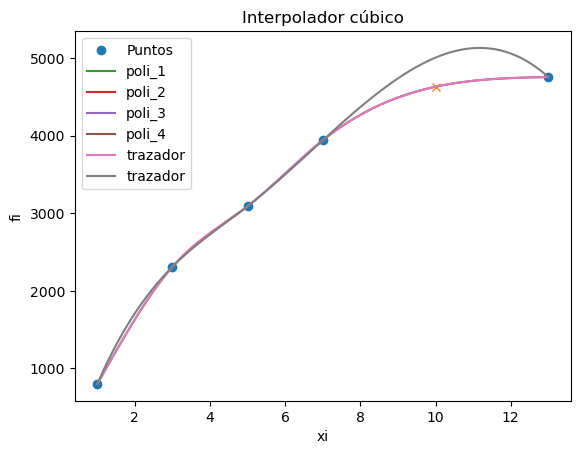

In [10]:
plt.plot(xi, fi,'o', label = 'Puntos')
plt.plot(10, p_4(10),'x')
plt.plot(pxi_1, p_1(pxi_1), label = 'poli_1')
plt.plot(pxi_2, p_2(pxi_2), label = 'poli_2')
plt.plot(pxi_3, p_3(pxi_3), label = 'poli_3')
plt.plot(pxi_4, p_4(pxi_4), label = 'poli_4')
plt.plot(x, T(x), label = 'trazador')
plt.plot(x, T_2(x), label = 'trazador')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolador cúbico')
plt.show()
plt.close()

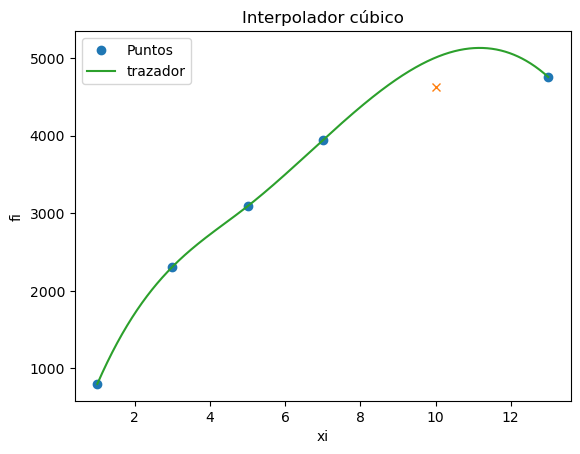

In [11]:
from scipy.interpolate import interp1d

from scipy.interpolate import CubicSpline
xi = np.array([1, 3, 5, 7, 13])
fi = np.array([800, 2310, 3090, 3940, 4755])
T_lineal = interp1d(xi, fi, kind=1)
T_cuadratico = interp1d(xi, fi, kind=2)
T_cubic = interp1d(xi, fi, kind=3)

plt.plot(xi, fi,'o', label = 'Puntos')
plt.plot(10, p_4(10),'x')
# plt.plot(x, T_lineal(x), label = 'trazador')
# plt.plot(x, T_cuadratico(x), label = 'trazador')
plt.plot(x, T_cubic(x), label = 'trazador')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolador cúbico')
plt.show()
plt.close()

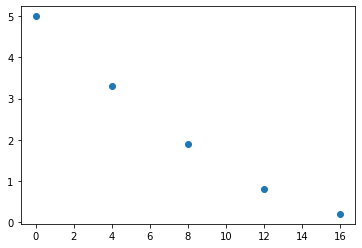

In [12]:
x = np.array([0,4,8,12,16])
y = np.array([5, 3.3, 1.9, 0.8, 0.2])
plt.plot(x, y,'o')
plt.show()

Regresión cuadrática: y = 0.011x^2 + -0.481x + 5.017


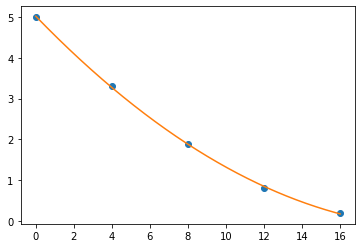

Coeficiente de determinación: 0.9996970959070084


In [13]:
x = np.array([0,4,8,12,16])
y = np.array([5, 3.3, 1.9, 0.8, 0.2])

sum_xi = np.sum(x)
sum_xi_2 = np.sum(x**2)
sum_xi_3 = np.sum(x**3)
sum_xi_4 = np.sum(x**4)
sum_yi = np.sum(y)
sum_xiyi = np.sum(x*y)
sum_xi_2yi = np.sum(x**2*y)
a = np.array([[sum_xi_4, sum_xi_3, sum_xi_2],
              [sum_xi_3, sum_xi_2, sum_xi],
              [sum_xi_2, sum_xi, len(x)]])
b = np.array([sum_xi_2yi, sum_xiyi ,sum_yi])
solve_cuad = np.linalg.solve(a, b)
f_cuad = lambda x: solve_cuad[0]*x**2 + solve_cuad[1]*x + solve_cuad[2]
print(f'Regresión cuadrática: y = {solve_cuad[0]:.3f}x^2 + {solve_cuad[1]:.3f}x + {solve_cuad[2]:.3f}')

xi = np.linspace(np.min(x),np.max(x),1001)
plt.plot(x, y,'o')
plt.plot(xi, f_cuad(xi),'-')
plt.show()

y_media = y.mean()
y_predict = f_cuad(x)
s_t = ((y - y_media)**2).sum()
s_r = ((y - y_predict)**2).sum()
r_2_cuad = (s_t - s_r) / s_t
print(f'Coeficiente de determinación: {r_2_cuad}')